# Lucid Data Assignment by siddarth sharma

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv("paywall_payment_data.csv")
df2= pd.read_csv("paywall_data.csv")
#paid=df2[df2["Paid?"] == 1]

In [119]:
print("the total number of Customers are:",df['id'].nunique())
print("the total number of Paid customers are:",paid['id'].nunique())

the total number of Customers are: 55263
the total number of Paid customers are: 2035


Here, I merged both the data files based on the customer id ("id") and stored the result in a dataframe called df3.
Then I filtered df3 to focus on only paid customers and stored the result in df4 and replaced the nan values with zero

In [120]:
df3=pd.merge(df,df2,on=['id'],how='inner',indicator=True)
df4=df3[df3["Paid?"] == 1]
df4.isna().sum()
df4.replace(np.nan,0,inplace=True)
df4.tail()

,id,First Payment Date,First Payment Value,Paid?,Registration Date,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,...,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,_merge
55244,437065,2/9/16 9:37 PM,71.40,1,3/1/16 14:11,NaN,NaN,4/20/16 16:35,NaN,2/18/16 13:40,...,NaN,2/9/16 21:33,2/2/16 21:25,1/25/16 16:32,NaN,2/2/16 18:16,NaN,NaN,NaN,both
55245,435231,2/18/16 3:59 PM,19.95,1,2/18/16 15:40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
55246,424856,3/15/16 6:21 AM,9.95,1,3/9/16 20:02,NaN,3/9/16 20:39,1/4/16 12:18,NaN,NaN,...,NaN,NaN,3/13/16 0:07,NaN,NaN,NaN,NaN,3/9/16 20:37,NaN,both
55251,333684,11/28/14 12:47 PM,480.00,1,3/22/16 7:41,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
55257,136845,3/17/16 9:42 AM,19.95,1,3/17/16 3:42,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/17/16 5:52,both


# Q1 Which paywalls have the best conversion rate?

Here, I calculated the conversion rate for all the paywalls by counting the number of dates for each paywall ( for all users) and doing the same for only paid users

In [121]:
Conversion_rate=round((df2.loc[:,'(Pw) Analytics':].count()/len(df2))*100,2).reset_index(False)
Conversion_rate = Conversion_rate.rename(columns={'index': 'Paywalls', 0: 'Conversion rate%'})
Conversion_rate=Conversion_rate.sort_values('Conversion rate%', ascending=False).reset_index(False)
Conversion_rate=Conversion_rate.drop(['index'], 1)
Conversion_rate

,Paywalls,Conversion rate%
0,(Pw) Pdf-dpi,7.72
1,(Pw) Page-Limit,6.37
2,(Pw) Premium Templates,6.15
3,(Pw) Color-Management,5.14
4,(Pw) Storage,5.04
5,(Pw) Custom-Fonts,3.66
6,(Pw) Downloadable-Publication,2.72
7,(Pw) Email-Thumb,2.28
8,(Pw) Publish-banner,1.31
9,(Pw) Pub-Password,0.54


<Figure size 1584x1368 with 0 Axes>

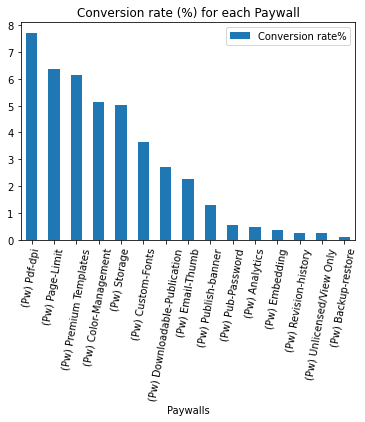

In [143]:
plt.figure(figsize =(22,19))
Conversion_rate.plot.bar(x="Paywalls", y="Conversion rate%", rot=80, title="Conversion rate (%) for each Paywall");
plt.show(block=True)

In [124]:
print(" The Paywall- Pdf-dpi has the highest conversion rate of 7.72%. It is closley followed by Page limit and Premium Templates")

 The Paywall- Pdf-dpi has the highest conversion rate of 7.72%. It is closley followed by Page limit and Premium Templates


# Q2 Which paywalls contribute most to revenue?

I had already filtered the users to focus on paid ones, let's have another look at how does that dataframe look

In [72]:
df4.head()

,id,First Payment Date,First Payment Value,Paid?,Registration Date,(Pw) Analytics,(Pw) Backup-restore,(Pw) Color-Management,(Pw) Custom-Fonts,(Pw) Downloadable-Publication,...,(Pw) Embedding,(Pw) Page-Limit,(Pw) Pdf-dpi,(Pw) Premium Templates,(Pw) Pub-Password,(Pw) Publish-banner,(Pw) Revision-history,(Pw) Storage,(Pw) Unlicensed/View Only,_merge
87,13015895,4/28/16 9:31 PM,19.95,1,3/31/16 19:52,0,0,4/28/16 5:58,0,4/28/16 21:20,...,0,0,4/28/16 5:35,0,0,0,0,0,0,both
114,13014846,4/7/16 10:40 PM,9.95,1,3/31/16 18:48,0,0,4/7/16 22:41,0,0,...,0,4/7/16 22:31,0,0,0,0,0,0,0,both
167,13013346,4/10/16 1:24 PM,9.95,1,3/31/16 17:18,0,0,0,0,0,...,0,0,4/10/16 13:17,0,0,0,0,0,0,both
173,13013159,3/31/16 5:07 PM,155.40,1,3/31/16 17:06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,both
177,13013111,4/7/16 10:02 AM,71.40,1,3/31/16 17:03,0,0,0,0,0,...,0,0,0,0,0,0,0,4/2/16 14:33,0,both


The datatype of columns whiuch contained dates is of type "object". For my analysis, I converted them to datetime and then to timestamp

In [107]:
df4['First Payment Date'] =  pd.to_datetime(df4['First Payment Date'])
df4.iloc[:, 5:20] = df4.iloc[:, 5:20].apply(pd.to_datetime)

ls = ['First Payment Date','(Pw) Analytics','(Pw) Backup-restore',
      '(Pw) Color-Management', '(Pw) Custom-Fonts', '(Pw) Downloadable-Publication', 
      '(Pw) Email-Thumb', '(Pw) Embedding', '(Pw) Page-Limit', '(Pw) Pdf-dpi',
      '(Pw) Premium Templates', '(Pw) Pub-Password', '(Pw) Publish-banner',
      '(Pw) Revision-history', '(Pw) Storage', '(Pw) Unlicensed/View Only']

def convertToTimestamp(x):
    
    if(type(x) != float): 
        return x.timestamp()
    
    return x

for col in ls:
    fname = col + '_ts'
    df4[fname] = df4[col].apply(lambda x: convertToTimestamp(x)) 

Now that my columns are of the correct data type, I matched a paywall with the date timestamp closest (less than or equal) to the first payment date's timestap and this gave me the paywall for which the first payment was made.

In [114]:
lst = ['id','First Payment Date_ts', 'First Payment Value',
        '(Pw) Analytics_ts', '(Pw) Backup-restore_ts',
       '(Pw) Color-Management_ts', '(Pw) Custom-Fonts_ts',
       '(Pw) Downloadable-Publication_ts', '(Pw) Email-Thumb_ts',
       '(Pw) Embedding_ts', '(Pw) Page-Limit_ts', '(Pw) Pdf-dpi_ts',
       '(Pw) Premium Templates_ts', '(Pw) Pub-Password_ts',
       '(Pw) Publish-banner_ts', '(Pw) Revision-history_ts', '(Pw) Storage_ts',
       '(Pw) Unlicensed/View Only_ts']

final = pd.DataFrame()
df6 = df4[lst]
ans = []
for i in range(len(df6)):
    row = df6.iloc[i]
    date1 = row[1]
    index = -1
    min_= float('inf')
    for idx in range(3,len(row)):
        if(date1 > row[idx]):
            prev = min_
            min_ = min(date1-row[idx],min_)
            if(prev != min_):
                index = idx
    
    ans.append([row[0], row[2],lst[index]])

final = pd.DataFrame(ans,columns=['id','First Payment Value','Paywall'])
final.id=final.id.astype(int)

final.head(10)

,id,First Payment Value,Paywall
0,13015895,19.95,(Pw) Email-Thumb_ts
1,13014846,9.95,(Pw) Page-Limit_ts
2,13013346,9.95,(Pw) Pdf-dpi_ts
3,13013159,155.40,(Pw) Analytics_ts
4,13013111,71.40,(Pw) Storage_ts
5,13013034,155.40,(Pw) Pdf-dpi_ts
6,13012965,9.95,(Pw) Page-Limit_ts
7,13012461,71.40,(Pw) Email-Thumb_ts
8,13012397,9.95,(Pw) Backup-restore_ts
9,13011012,9.95,(Pw) Analytics_ts


As we can see in the above data frame, the paywall for which each user made the first payment has been identified.
I grouped the paywalls to find each paywall's total revenue for all customers in the below code.

In [127]:
df_sum= final.groupby("Paywall")
df_sum= df_sum.agg({"First Payment Value": "sum"})
df_sum = df_sum.sort_values('First Payment Value', ascending=False).reset_index()
#print("Each Merchant has the following number of bank accounts:\n")
#df_sum= df_sum.iloc[1:]
df_sum = df_sum.rename(columns={'First Payment Value': 'Total Revenue'})
print("The total Revenue for each Paywall as follows:")
df_sum

The total Revenue for each Paywall as follows: 


,Paywall,Total Revenue
0,(Pw) Analytics_ts,53412.78
1,(Pw) Page-Limit_ts,11054.42
2,(Pw) Pdf-dpi_ts,10434.95
3,(Pw) Storage_ts,7664.75
4,(Pw) Color-Management_ts,4744.50
5,(Pw) Custom-Fonts_ts,4597.54
6,(Pw) Downloadable-Publication_ts,2910.73
7,(Pw) Premium Templates_ts,2323.54
8,(Pw) Email-Thumb_ts,2234.55
9,(Pw) Backup-restore_ts,1899.56


In [144]:
print("The Paywall with the highest revenue is Analytics, and it makes up",100*round(53412.78/sum(df4["First Payment Value"]),2),"% of total revenue")

The Paywall with the highest revenue is Analytics, and it makes up 52.0 % of total revenue


<Figure size 1584x936 with 0 Axes>

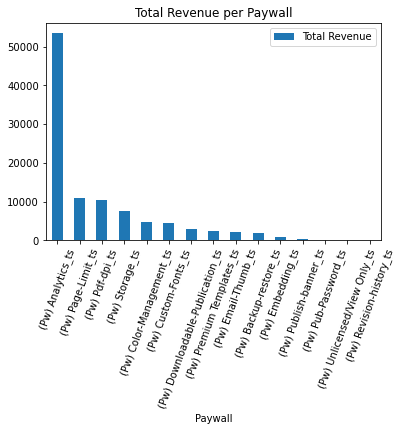

In [139]:
plt.figure(figsize =(22,13))
df_sum.plot.bar(x="Paywall", y="Total Revenue", rot=70, title="Total Revenue per Paywall");
plt.show(block=True)